### Librerías

In [ ]:
#Empezamos importando las liberías necesarias
import os
import sys
import time

#Matemáticas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Estadísticas
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Procesamiento y optimización
import torch
from torch import nn
import torchvision

import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.transforms.functional as functional
from torch.utils.data import DataLoader, Dataset

#Machine Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

## Exploración de data



### Importar la data (debe estar subida al drive)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pickle

# Cargar el archivo .pkl desde Google Drive
with open('/content/drive/My Drive/stamps.pkl', 'rb') as f:
    data = pickle.load(f)

# Mostrar el tipo de dato del objeto cargado
print(f"Tipo de dato cargado: {type(data)}")

# Mostrar las claves del diccionario
print("Claves del diccionario:")
print(data.keys())

N = 5
# Mostrar los primeros N elementos
print("\nPrimeros", N + 1, "elementos:")
for i, (key, value) in enumerate(data.items()):
    if i < N:  # Cambia  N para que funcione con valores distintos
        print(f"Clave: {key}, Valor: {value}")
    else:
        break

Mounted at /content/drive
Tipo de dato cargado: <class 'dict'>
Claves del diccionario:
dict_keys(['Train', 'Validation', 'Test'])

Primeros 6 elementos:
Clave: Train, Valor: {'images': array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [1.84087455e-03, 3.67044093e-04, 1.73346788e-01],
         [1.98828382e-03, 4.14328562e-04, 1.70802355e-01],
         [2.12824903e-03, 6.52466551e-04, 1.71260193e-01]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [1.72108761e-03, 7.32960762e-04, 1.76224440e-01],
         [1.48706336e-03, 3.94942763e-04, 1.77301437e-01],
         [2.02896260e-03, 5.32542123e-04, 1.72201887e-01]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.0000

### Conjuntos como variables independientes y extracción de características.

In [ ]:
# Separar los conjuntos en variables independientes
Conjunto_Train = data['Train']
Conjunto_Validation = data['Validation']
Conjunto_Test = data['Test']

# Función para extraer las imágenes de ciencia, referencia y diferencia
def extraer_canales(conjunto):
    science = conjunto['images'][:, :, :, 0]  # Canal de ciencia
    reference = conjunto['images'][:, :, :, 1]  # Canal de referencia
    difference = conjunto['images'][:, :, :, 2]  # Canal de diferencia
    return science, reference, difference

# Extraer canales para cada conjunto
science_train, reference_train, difference_train = extraer_canales(Conjunto_Train)
science_validation, reference_validation, difference_validation = extraer_canales(Conjunto_Validation)
science_test, reference_test, difference_test = extraer_canales(Conjunto_Test)

In [ ]:
# Dimensiones de los arrays de imágenes para cada conjunto de datos
for key in data.keys():
    images = data[key]['images']  # Extrae el array de imágenes para cada clave
    print(f"Conjunto: {key}")
    print(f" - Número de imágenes: {images.shape[0]}")
    print(f" - Dimensiones de cada imagen: {images.shape[1:]}")  # Muestra las dimensiones de una imagen
    print("="*50)

Conjunto: Train
 - Número de imágenes: 72710
 - Dimensiones de cada imagen: (63, 63, 3)
Conjunto: Validation
 - Número de imágenes: 500
 - Dimensiones de cada imagen: (63, 63, 3)
Conjunto: Test
 - Número de imágenes: 500
 - Dimensiones de cada imagen: (63, 63, 3)


### Visualización de imágenes (entrenamiento, validación y testeo)

Imagenes de entrenamiento


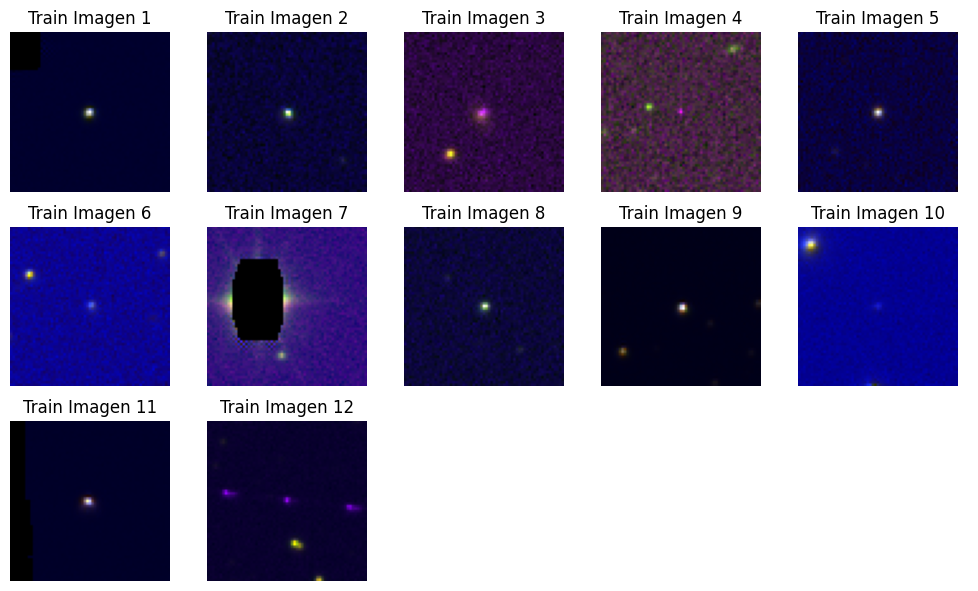


Imagenes de Validacion


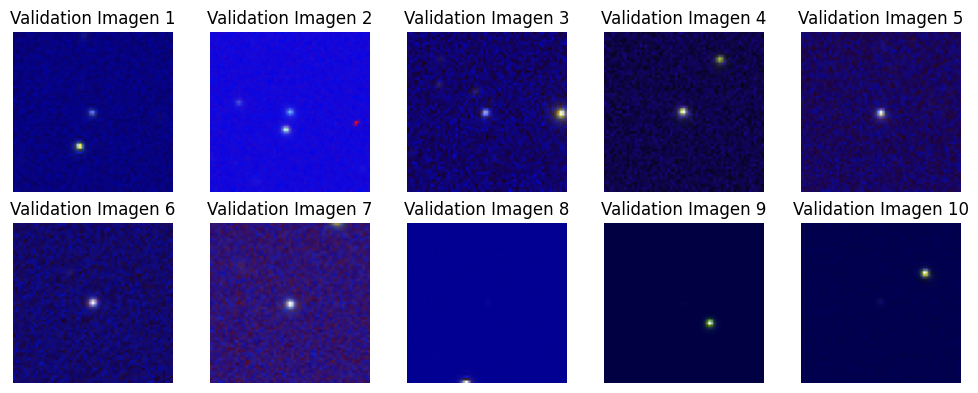


Imagenes de prueba


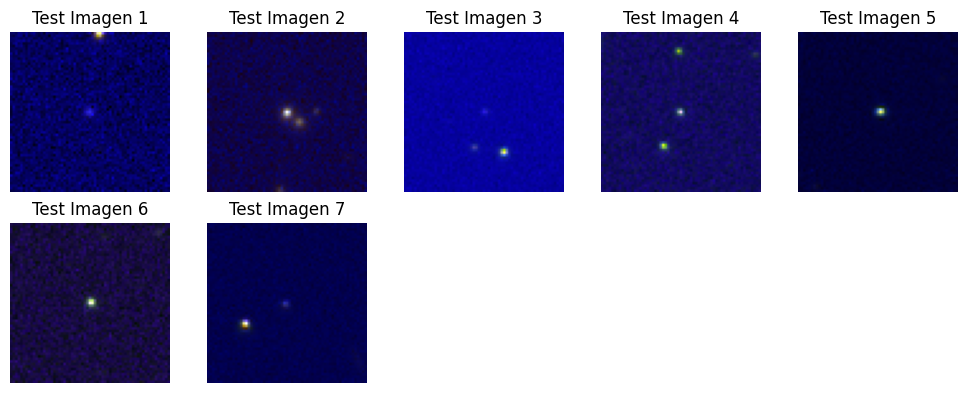

In [ ]:
# Función para mostrar imágenes de una clave específica
def mostrar_imagenes(data, clave, num_images=10, num_cols=5):
    # Extraer las imágenes correspondientes a la clave
    images = data[clave]['images']

    # Definir el número de filas
    num_rows = (num_images // num_cols) + (1 if num_images % num_cols != 0 else 0)

    # Crear la figura y los ejes para el grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))

    # Iterar a través del número de imágenes
    for i in range(num_rows * num_cols):
        # Determinar el índice de fila y columna del eje
        row = i // num_cols
        col = i % num_cols

        if i < num_images:
            # Mostrar la imagen en la posición adecuada
            axes[row, col].imshow(images[i])
            axes[row, col].set_title(f"{clave} Imagen {i + 1}")
            axes[row, col].axis('off')
        else:
            # Si no hay más imágenes, ocultar los ejes restantes
            axes[row, col].axis('off')

    # Ajustar el espacio entre subplots
    plt.tight_layout()
    plt.show()

# Visualizar imágenes de cada conjunto de datos

# Cambia `num_images` para mostrar más o menos imágenes.
print("Imagenes de entrenamiento")
mostrar_imagenes(data, 'Train', num_images=12, num_cols=5)
print()
print("Imagenes de Validacion")
mostrar_imagenes(data, 'Validation', num_images=10, num_cols=5)
print()
print("Imagenes de prueba")
mostrar_imagenes(data, 'Test', num_images=7, num_cols=5)

### Estudio de la primera imagen del conjunto de entrenamiento

Dimensiones de la primera imagen: (63, 63, 3)
Array que representa la primera imagen:
[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.00184087 0.00036704 0.17334679]
  [0.00198828 0.00041433 0.17080235]
  [0.00212825 0.00065247 0.1712602 ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.00172109 0.00073296 0.17622444]
  [0.00148706 0.00039494 0.17730144]
  [0.00202896 0.00053254 0.17220189]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.00159189 0.00049468 0.17761225]
  [0.0013119  0.00066013 0.17946786]
  [0.00128325 0.00057801 0.18217702]]

 ...

 [[0.00140347 0.00041863 0.17731617]
  [0.00088695 0.0006592  0.1873621 ]
  [0.00216055 0.00051134 0.17286736]
  ...
  [0.0018965  0.00056648 0.1730455 ]
  [0.00178964 0.00052906 0.17432909]
  [0.00153411 0.00048819 0.

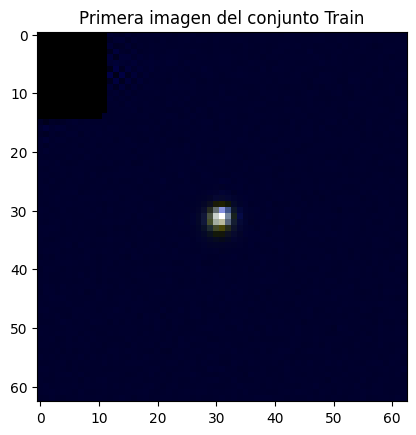

In [ ]:
# Primera imagen del conjunto 'Train'
primera_imagen = data['Train']['images'][0]

# Dimensiones de la primera imagen
print(f"Dimensiones de la primera imagen: {primera_imagen.shape}")  # Esto debería imprimir (63, 63, 3)

# Mostrar el array de la primera imagen
print("Array que representa la primera imagen:")
print(primera_imagen)

import matplotlib.pyplot as plt

# Mostrar la primera imagen
plt.imshow(primera_imagen)
plt.title('Primera imagen del conjunto Train')
plt.show()

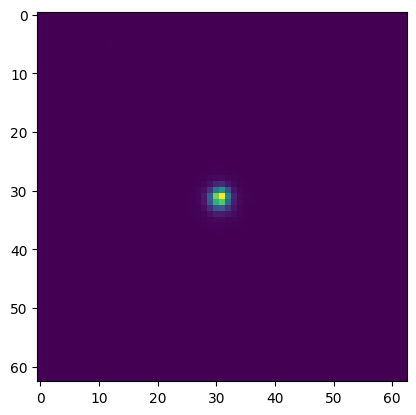

In [ ]:
plt.imshow(primera_imagen[:,:,0]) # science

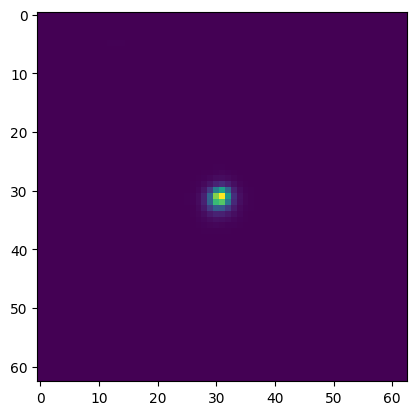

In [ ]:
plt.imshow(primera_imagen[:,:,1])# reference

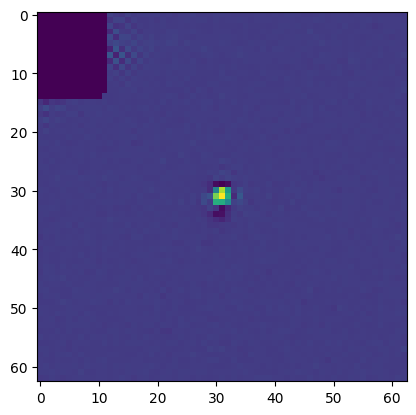

In [ ]:
plt.imshow(primera_imagen[:,:,2])# diference

existe una relación directa entre los corchetes y las dimensiones de la imagen. primero se va a desglosar lo que significa cada dimensión en la forma (63, 63, 3):

Primera dimensión (63): Este número representa la altura de la imagen en píxeles. En tu caso, la imagen tiene 63 píxeles de alto.

Segunda dimensión (63): Este número representa el ancho de la imagen en píxeles. Así que tu imagen tiene 63 píxeles de ancho.

Tercera dimensión (3): Este número representa la profundidad del color de la imagen. En este caso, indica que la imagen tiene 3 canales de color, que suelen corresponder a los colores rojo, verde y azul (RGB).

Estructura del Array
Dado esto, el array que representa la imagen debería tener la siguiente estructura:

63 corchetes (cada uno representando una fila de píxeles en la altura de la imagen).
Dentro de cada uno de esos 63 corchetes, habrá 63 conjuntos (cada uno representando un píxel en esa fila), cada uno de los cuales es un array de 3 valores (los valores de los canales de color RGB).
Por lo tanto, la estructura completa del array debería verse así:

#### Ejemplo de la Estructura

[[[R, G, B], [R, G, B], ..., [R, G, B]], --> 1ra fila (63 píxeles)

 [[R, G, B], [R, G, B], ..., [R, G, B]],--> 2da fila (63 píxeles)

 ....

 ....
  
 ....
  
 ....

 [[R, G, B], [R, G, B], ..., [R, G, B]]]--> 63ra fila (63 píxeles)


Entonces, deberían haber un total de  63×63×3 valores en el array. Esto da un total de 3969 (63 × 63) conjuntos de valores RGB, organizados en un array tridimensional que representa cada píxel de la imagen.

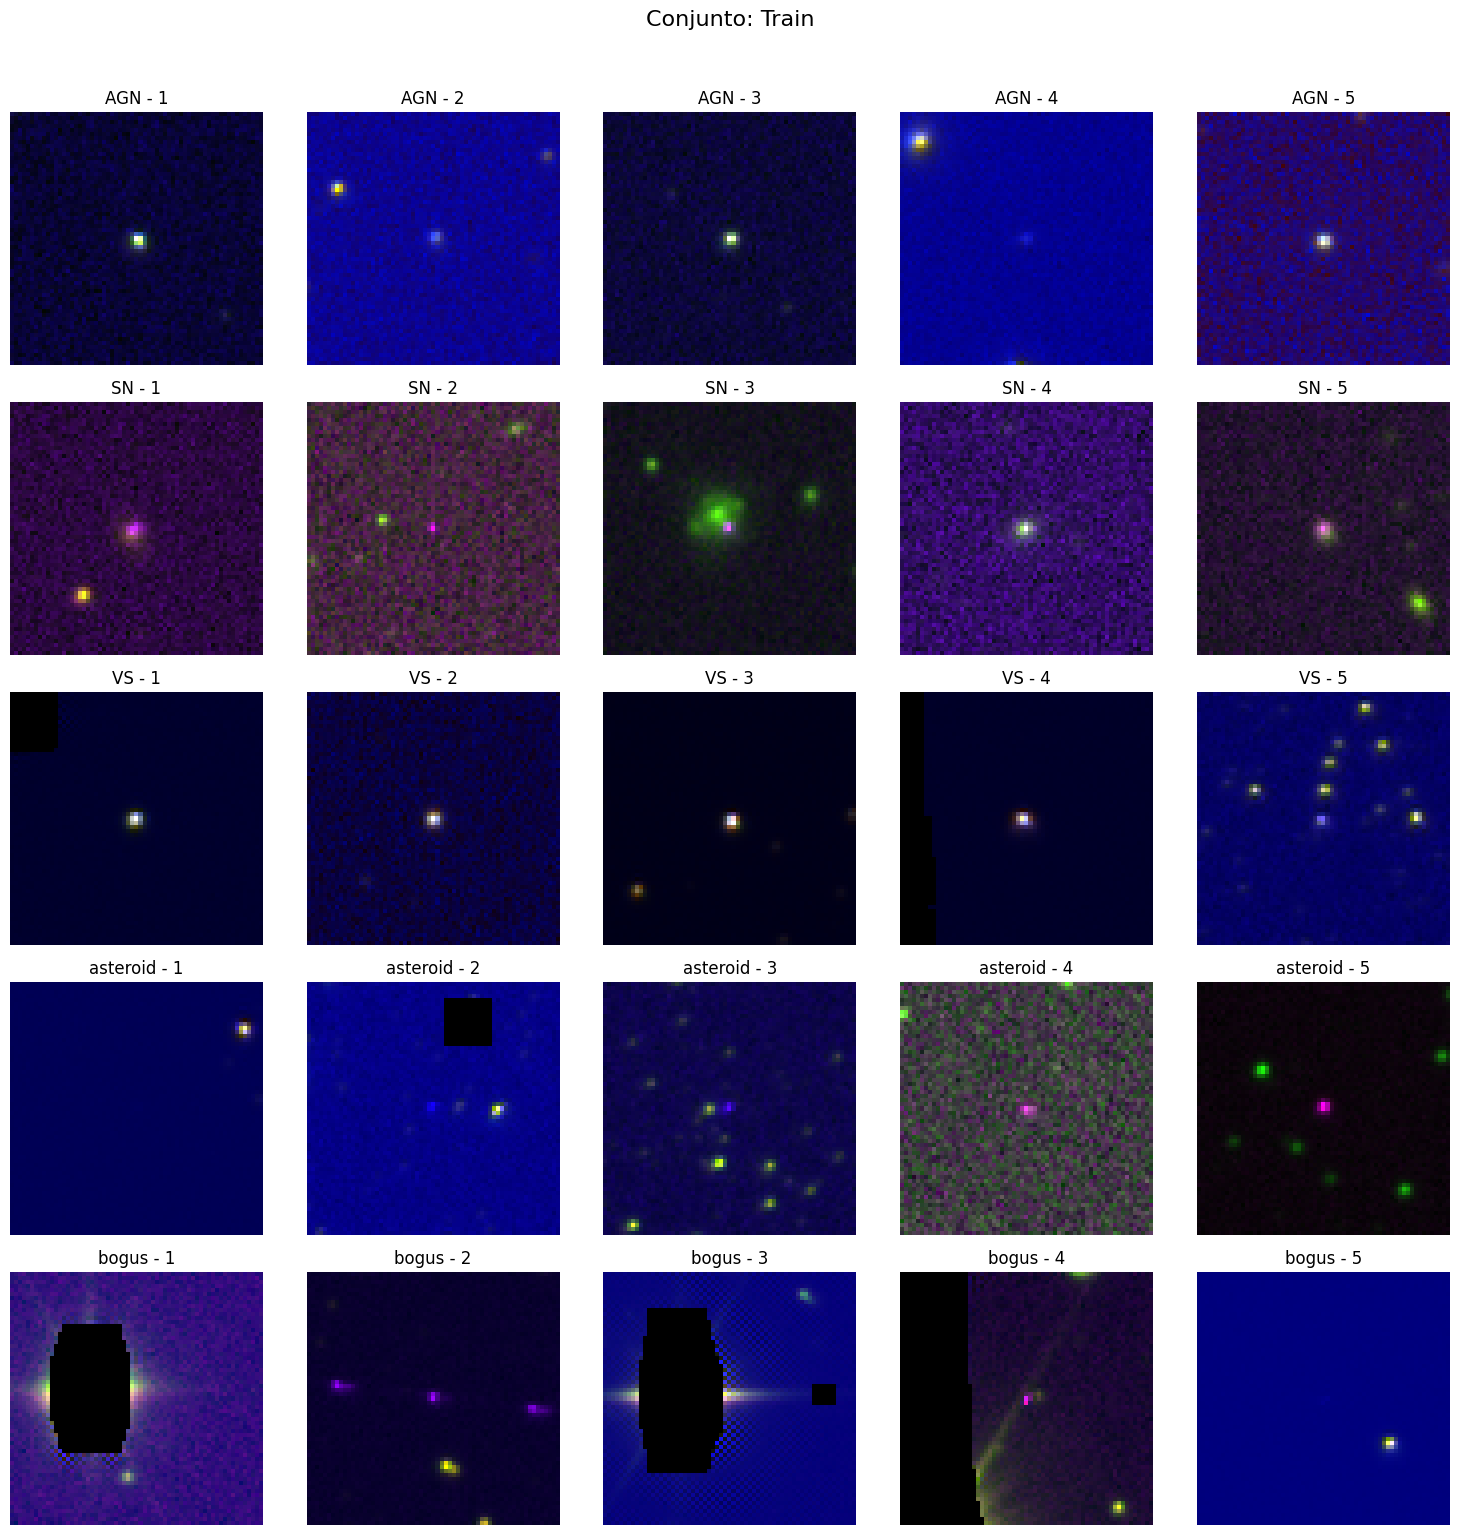

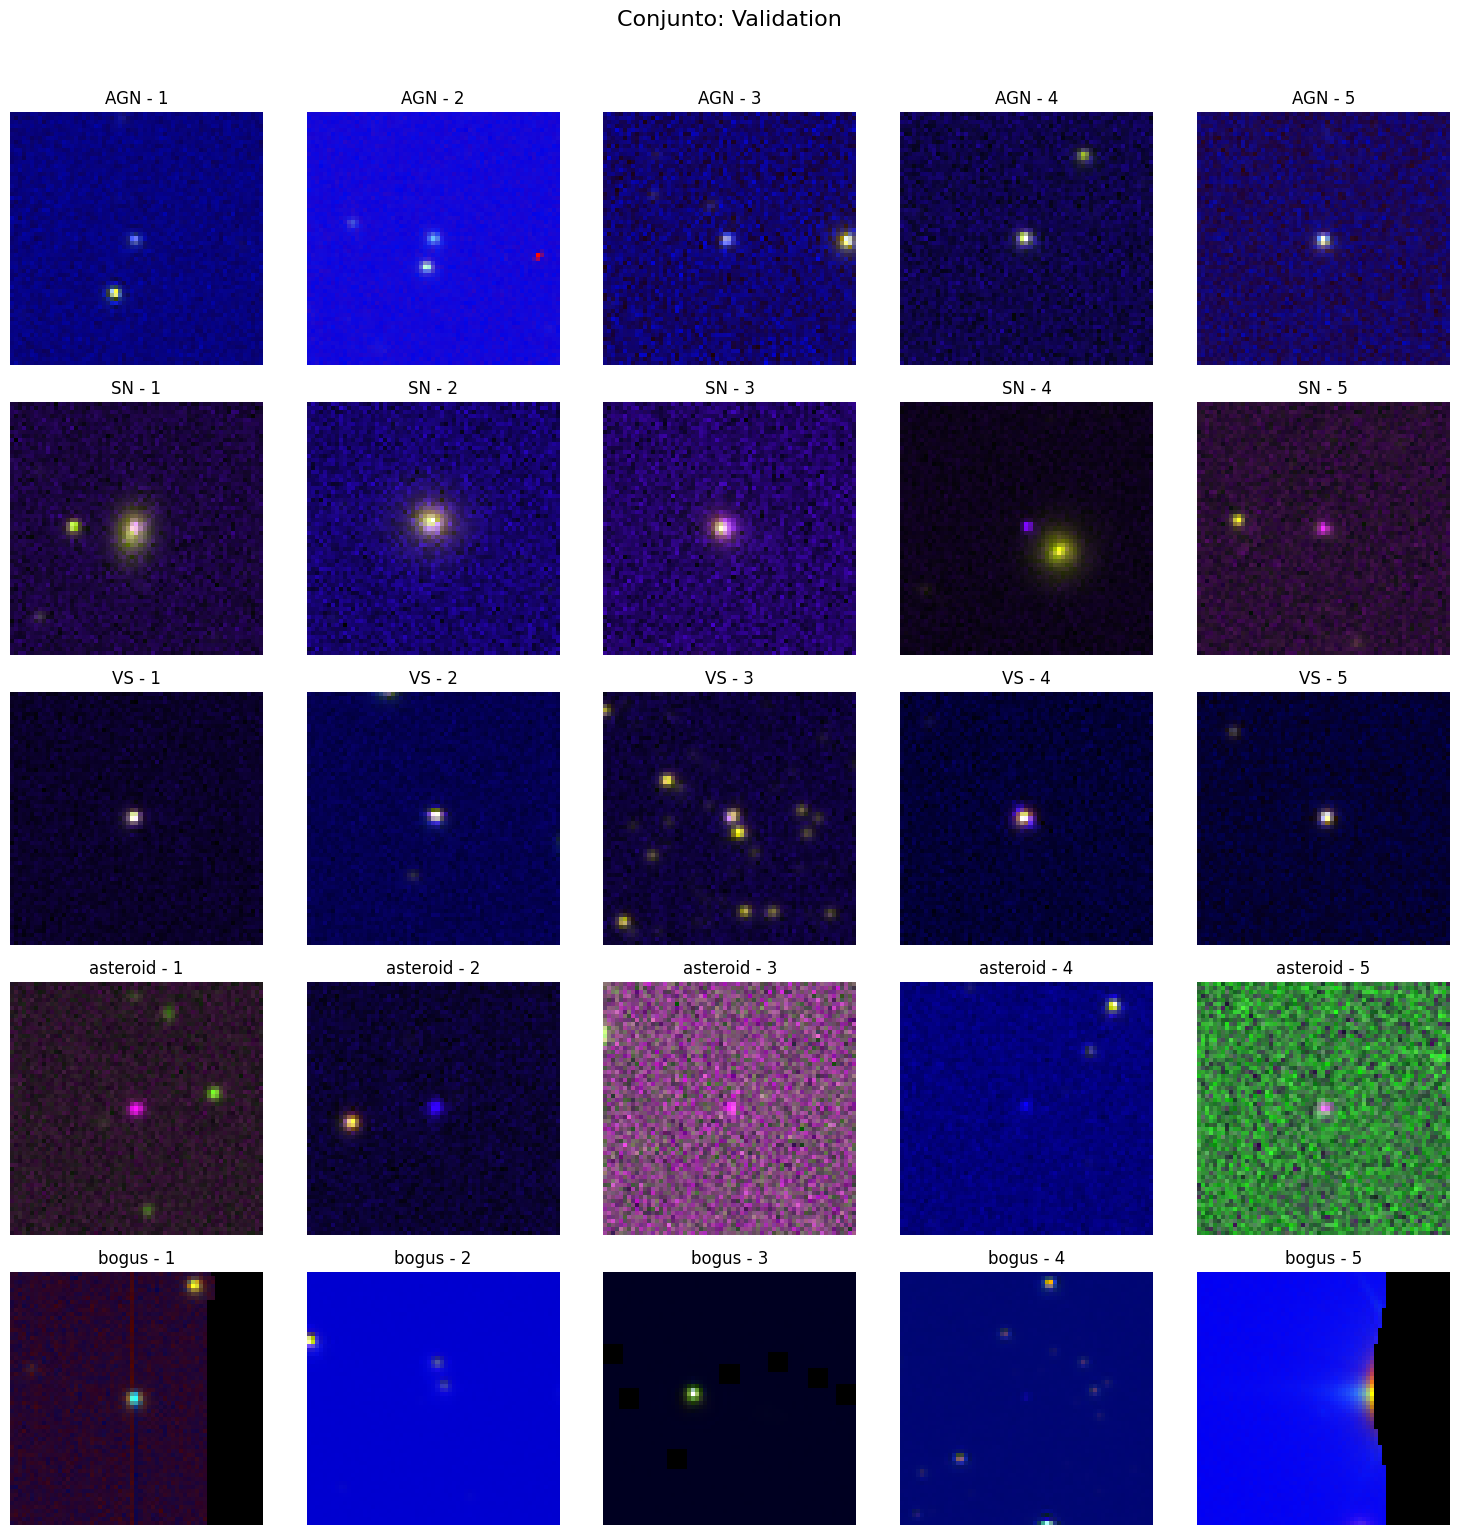

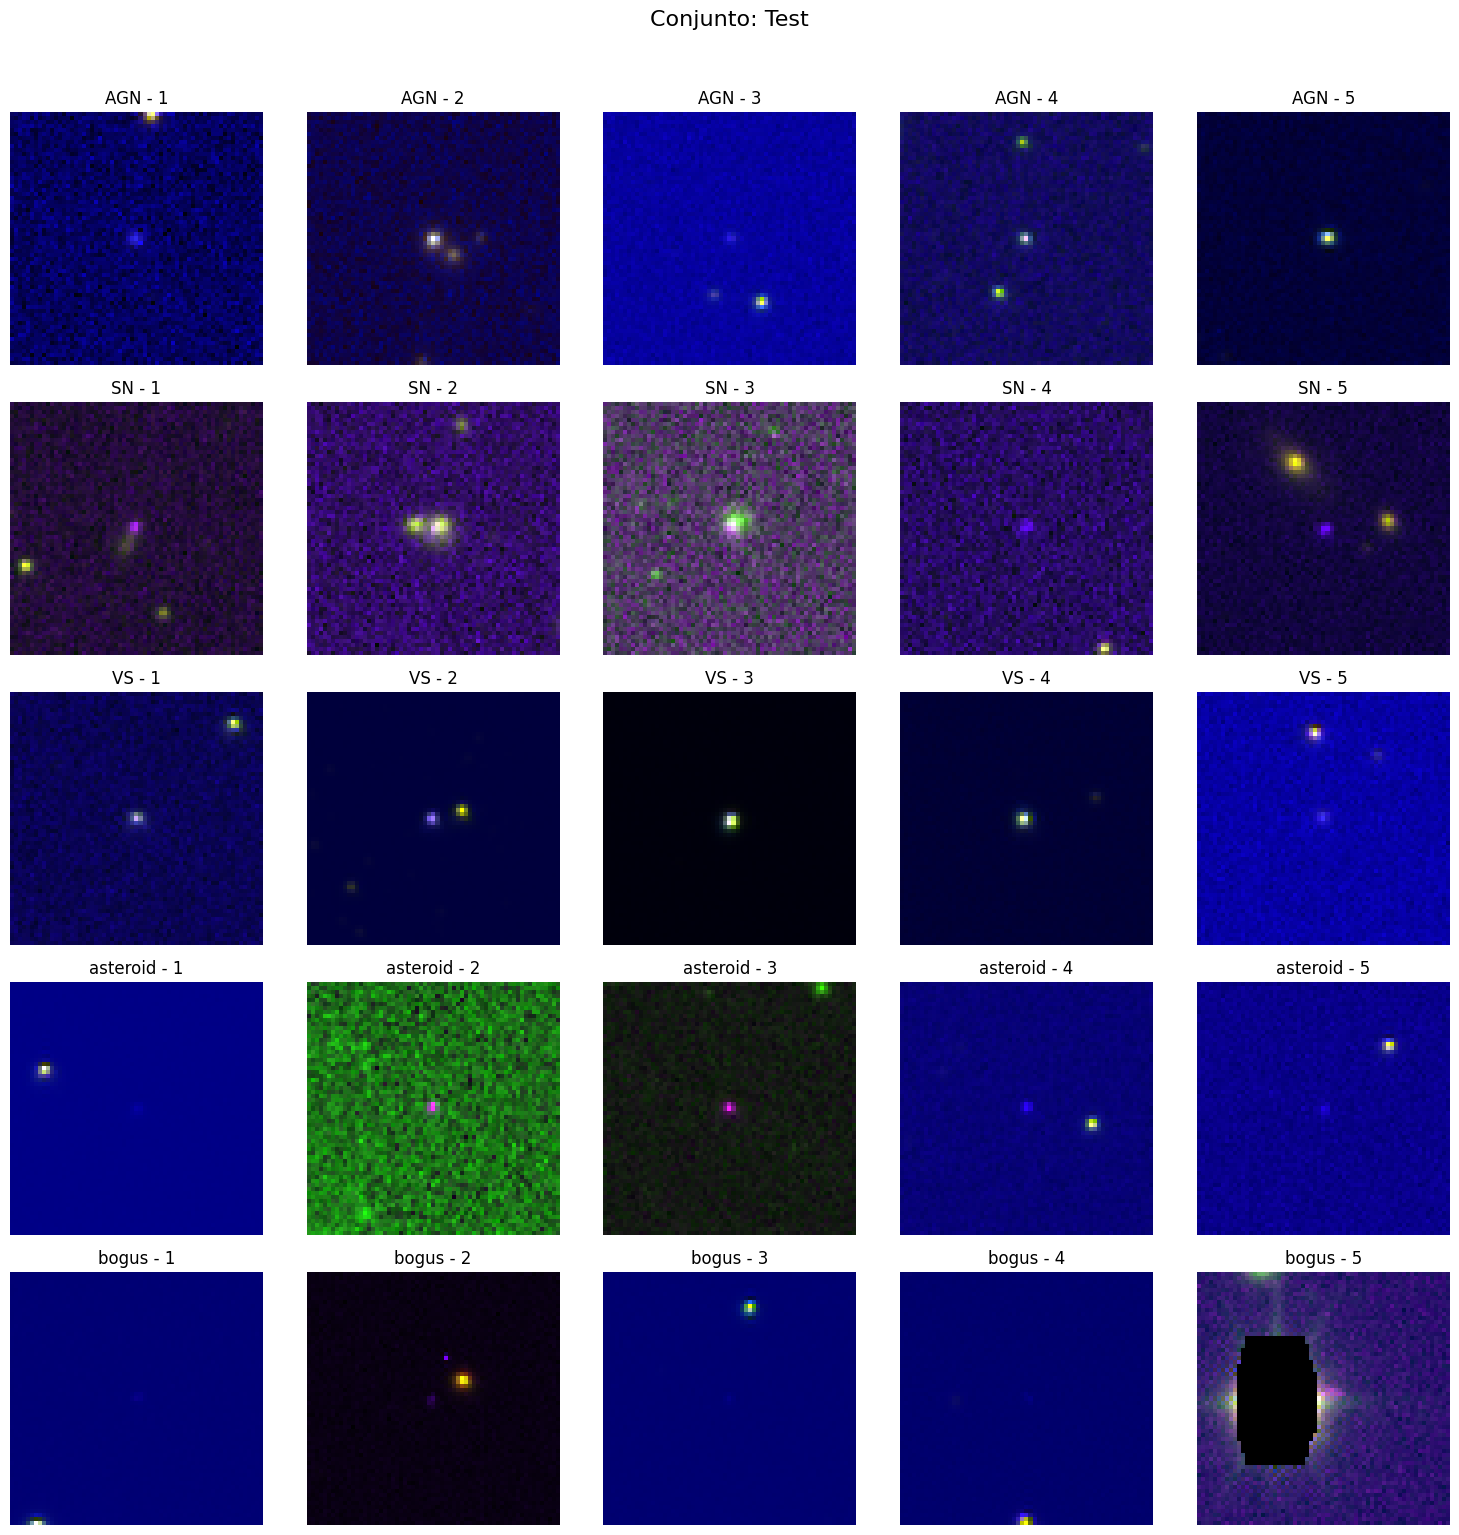

In [ ]:
def mostrar_imagenes_por_clase(data, num_imagenes_por_clase, conjunto):
    """
    Muestra imágenes agrupadas por clase para un conjunto específico.
    """
    labels = [0, 1, 2, 3, 4]
    classes = ['AGN', 'SN', 'VS', 'asteroid', 'bogus']

    # Calcular el número de filas total necesario
    total_filas = sum([(num_imagenes_por_clase[i] + 4) // 5 for i in range(len(labels))])

    # Crear la figura
    fig, axes = plt.subplots(total_filas, 5, figsize=(15, 3 * total_filas))
    fig.suptitle(f'Conjunto: {conjunto}', fontsize=16, y=1.02)

    # Índice de fila en el plot
    fila = 0

    for i, label in enumerate(labels):
        # Obtener las imágenes correspondientes a la clase 'label'
        imagenes_clase = [img for j, img in enumerate(data[conjunto]['images']) if data[conjunto]['labels'][j] == label]

        # Determinar la cantidad de filas necesarias para mostrar las imágenes
        num_filas = (num_imagenes_por_clase[i] + 4) // 5  # Redondeo hacia arriba
        imagen_mostrada = 0

        for f in range(num_filas):
            for col in range(5):
                if imagen_mostrada < num_imagenes_por_clase[i]:
                    # Mostrar la imagen en la posición correspondiente
                    axes[fila, col].imshow(imagenes_clase[imagen_mostrada])
                    axes[fila, col].set_title(f'{classes[i]} - {imagen_mostrada+1}')
                    axes[fila, col].axis('off')
                    imagen_mostrada += 1
                else:
                    # En caso de que no haya más imágenes para mostrar, ocultar el eje
                    axes[fila, col].axis('off')
            fila += 1

    plt.tight_layout()
    plt.show()

def mostrar_imagenes_todos_conjuntos(data, num_imagenes_por_clase):
    """
    Muestra imágenes agrupadas por clase para los conjuntos de Train, Validation y Test.
    """
    conjuntos = ['Train', 'Validation', 'Test']

    for conjunto in conjuntos:
        mostrar_imagenes_por_clase(data, num_imagenes_por_clase, conjunto)

# Parámetros de ejemplo para mostrar las imágenes (5 imágenes de cada clase)
num_imagenes_por_clase = [5, 5, 5, 5, 5]  # Puedes cambiar este valor para cada clase

# Llamada a la función con el conjunto de datos y la cantidad de imágenes por clase
mostrar_imagenes_todos_conjuntos(data, num_imagenes_por_clase)

In [ ]:
def generar_tabla_resumen(data):
    # Clases y conjuntos de datos
    clases = ['AGN', 'SN', 'VS', 'asteroid', 'bogus']
    conjuntos = ['Train', 'Validation', 'Test']

    # Encabezado de la tabla
    print(f"{'Conjunto':<12}{'AGN':<10}{'SN':<10}{'VS':<10}{'asteroid':<10}{'bogus':<10}{'Total':<10}")
    print("="*72)

    # Recorrer cada conjunto
    for conjunto in conjuntos:
        conteo_clases = np.zeros(len(clases), dtype=int)

        # Contar la cantidad de cada clase en el conjunto
        for label in data[conjunto]['labels']:
            conteo_clases[label] += 1

        # Mostrar fila para el conjunto actual
        total_conjunto = sum(conteo_clases)
        print(f"{conjunto:<12}{conteo_clases[0]:<10}{conteo_clases[1]:<10}{conteo_clases[2]:<10}{conteo_clases[3]:<10}{conteo_clases[4]:<10}{total_conjunto:<10}")

    # Mostrar una línea de separación al final
    print("="*72)

# Llamar a la función para generar la tabla resumen
generar_tabla_resumen(data)

Conjunto    AGN       SN        VS        asteroid  bogus     Total     
Train       14542     14542     14542     14542     14542     72710     
Validation  100       100       100       100       100       500       
Test        100       100       100       100       100       500       


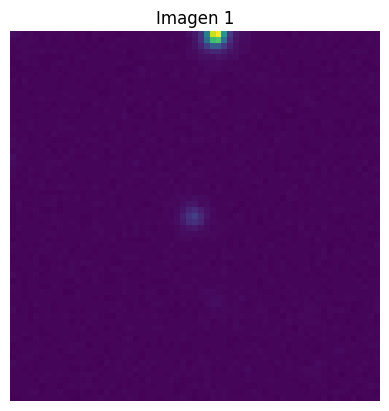

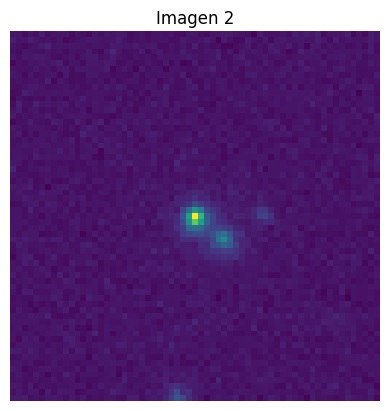

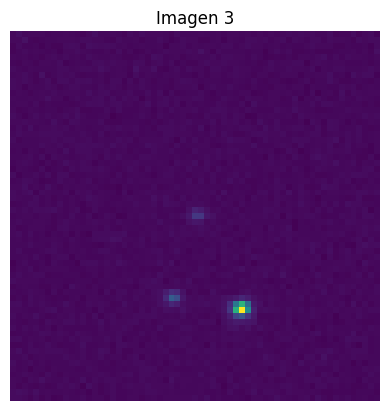

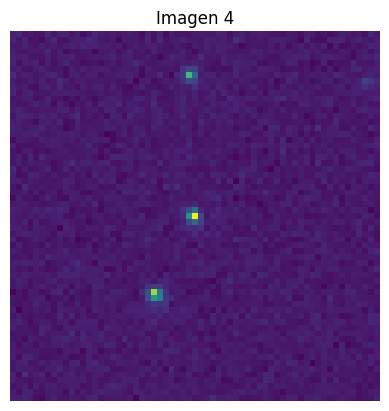

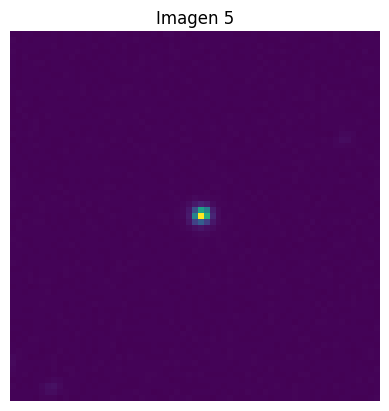

In [ ]:
# Número de imágenes a mostrar
num_imagenes = 5

# Nombre del conjunto/canal que quieres visualizar (cambia esto por la variable que quieras)
conjunto = science_test  # Cambia esto por reference_train, difference_train, etc.

# Mostrar las primeras 'num_imagenes' imágenes del conjunto seleccionado
for i in range(num_imagenes):
    plt.imshow(conjunto[i])
    plt.title(f'Imagen {i+1}')
    plt.axis('off')  # Quitar los ejes para una visualización más limpia
    plt.show()

#Proyecto CNN

###Funciones a implemnetar###

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pickle

# Cargar el archivo .pkl desde Google Drive
with open('/content/drive/My Drive/stamps.pkl', 'rb') as f:
    data = pickle.load(f)

# Mostrar el tipo de dato del objeto cargado
print(f"Tipo de dato cargado: {type(data)}")

#Claves son Train , Validation , test

#son imagenes 63x63x3 se estructura de la siguiente forma
#[a0,b1,c2] este es un pixel que tiene los 3 canales de science,reference y
#difference


# Separar los conjuntos en variables independientes llaves del diccionario
Conjunto_Train = data['Train']
Conjunto_Validation = data['Validation']
Conjunto_Test = data['Test']


#Con Conjunto['elementos']
#Elementos pueden ser: ['images', 'labels', 'features']  al ingresar a ['images']
#se ingresa a las figuras, ['labels'] permite ingresar a las clasificaciones y
#['features'] ingresa a los meta datos.



#Stamps science, reference y difference (canales)


#Images

#Conjunto['images'][a, b, c, d]
#a es el indice de la figura, b es la columna de la imagen a ,c es la vertical
#de la imagen a, d permite ontener las 3 stamps
#ya sea science, reference o difference

#Stamsp entrenamiento
science_train = Conjunto_Train['images'][:, :, :, 0]
reference_train = Conjunto_Train['images'][:, :, :, 1]
difference_train = Conjunto_Train['images'][:, :, :, 2]

#stamps validacion
science_validation = Conjunto_Validation['images'][:, :, :, 0]
reference_validation = Conjunto_Validation['images'][:, :, :, 1]
difference_validation = Conjunto_Validation['images'][:, :, :, 2]

#stamps testeo
science_test = Conjunto_Test['images'][:, :, :, 0]
reference_test = Conjunto_Test['images'][:, :, :, 1]
difference_test = Conjunto_Test['images'][:, :, :, 2]


#labels
#Clasificaciones
labels_train = Conjunto_Train['labels']
labels_validation = Conjunto_Validation['labels']
labels_test = Conjunto_Test['labels']

#los labels posibles son [0,1,2,3,4] que corresponden a las categorias:
#['AGN', 'SN', 'VS', 'asteroid', 'bogus'] respectivamente

#clasificacion train
agn_train=labels_train[labels_train == 0]
sn_train=labels_train[labels_train == 1]
vs_train=labels_train[labels_train == 2]
asteroid_train=labels_train[labels_train == 3]
bogus_train=labels_train[labels_train == 4]

#clasificacion validation
agn_validation=labels_validation[labels_validation == 0]
sn_validation=labels_validation[labels_validation == 1]
vs_validation=labels_validation[labels_validation == 2]
asteroid_validation=labels_validation[labels_validation == 3]
bogus_validation=labels_validation[labels_validation == 4]

#clasificacion test
agn_test=labels_test[labels_test == 0]
sn_test=labels_test[labels_test == 1]
vs_test=labels_test[labels_test == 2]
asteroid_test=labels_test[labels_test == 3]
bogus_test=labels_test[labels_test == 4]


#features
features_train = Conjunto_Train['features']
features_validation = Conjunto_Validation['features']
features_test = Conjunto_Test['features']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tipo de dato cargado: <class 'dict'>


In [ ]:
def rotar_imagenes_conjuntas(conjunto_imagenes):
    # Listas para almacenar las imágenes rotadas
    lista0 = []
    lista90 = []
    lista180 = []
    lista270 = []

    # Iterar sobre cada imagen en el conjunto
    for imagen in conjunto_imagenes:
        # Rotar la imagen en diferentes ángulos
        rotacion0 = imagen
        rotacion90 = np.rot90(imagen)  # Rotación de 90°
        rotacion180 = np.rot90(imagen, 2)  # Rotación de 180°
        rotacion270 = np.rot90(imagen, 3)  # Rotación de 270°

        # Guardar las imágenes rotadas en sus respectivas listas
        lista0.append(rotacion0)
        lista90.append(rotacion90)
        lista180.append(rotacion180)
        lista270.append(rotacion270)

    # Devolver las listas con las rotaciones
    return lista0, lista90, lista180, lista270

def mostrar_rotaciones_de_lista(lista_rotaciones, titulo):
    # Mostrar todas las imágenes rotadas en una lista
    fig, axs = plt.subplots(1, len(lista_rotaciones), figsize=(12, 3))

    for i in range(len(lista_rotaciones)):
        axs[i].imshow(lista_rotaciones[i])
        axs[i].set_title(f'{titulo} - Imagen {i+1}')
        axs[i].axis('off')

    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def recortar_conjunto_centro(conjunto_imagenes):
    # Listas para almacenar las imágenes originales y recortadas
    Sinrecortar63x63 = []
    recortadas21x21 = []

    # Iterar sobre el conjunto de imágenes
    for imagen in conjunto_imagenes:
        # Dimensiones de la imagen original
        alto_original, ancho_original = imagen.shape[:2]

        # Coordenadas del centro de la imagen
        centro_alto = alto_original // 2
        centro_ancho = ancho_original // 2

        # Tamaño del recorte (21x21)
        tamaño_recorte = 21

        # Calcular los límites del recorte
        inicio_alto = centro_alto - tamaño_recorte // 2
        fin_alto = inicio_alto + tamaño_recorte
        inicio_ancho = centro_ancho - tamaño_recorte // 2
        fin_ancho = inicio_ancho + tamaño_recorte

        # Realizar el recorte
        imagen_recortada = imagen[inicio_alto:fin_alto, inicio_ancho:fin_ancho]

        # Agregar la imagen original y la recortada a sus respectivas listas
        Sinrecortar63x63.append(imagen)
        recortadas21x21.append(imagen_recortada)

    # Devolver las listas de imágenes originales y recortadas
    return Sinrecortar63x63, recortadas21x21

# Función para mostrar un conjunto de imágenes de una lista
def mostrar_imagenes_de_lista(lista_imagenes, titulo):
    fig, axs = plt.subplots(1, len(lista_imagenes), figsize=(12, 3))

    for i in range(len(lista_imagenes)):
        axs[i].imshow(lista_imagenes[i], cmap='gray')
        axs[i].set_title(f'{titulo} - Imagen {i+1}')
        axs[i].axis('off')

    plt.show()

Ejemplo de la funcion

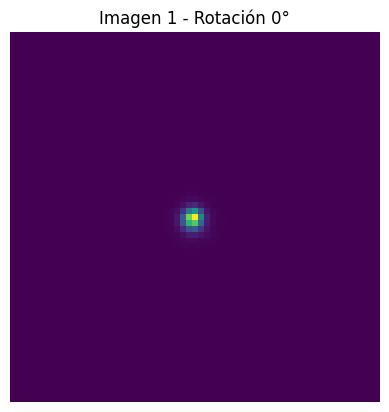

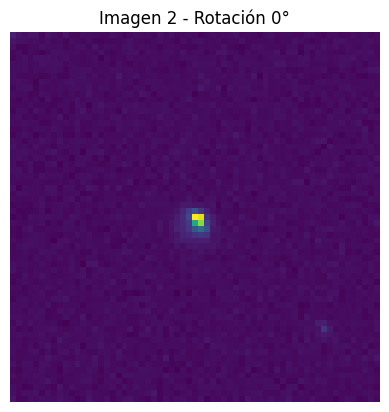

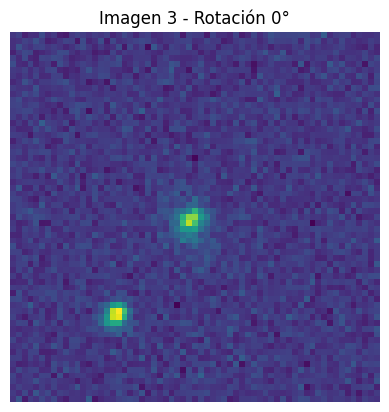

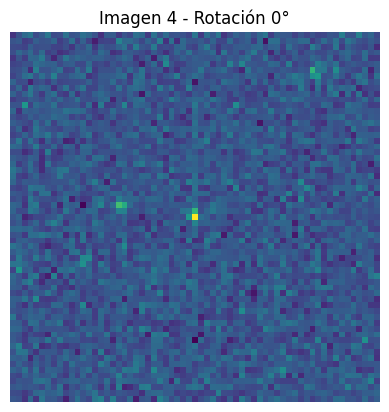

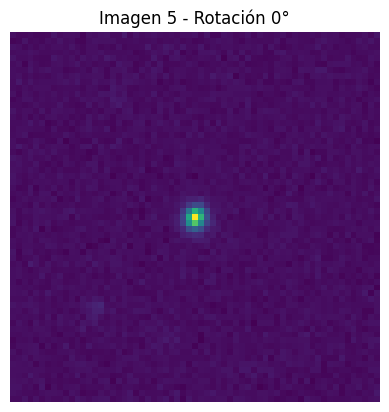

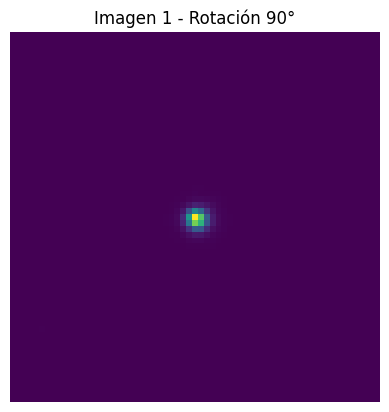

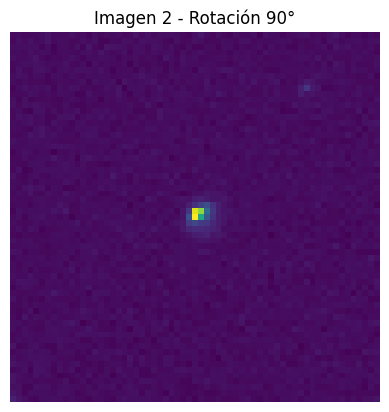

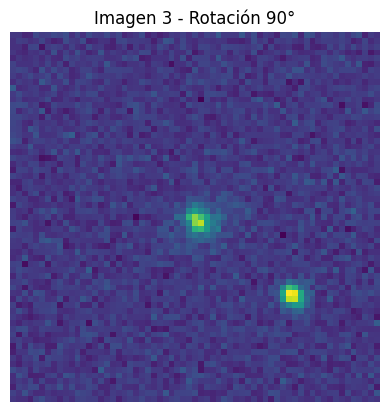

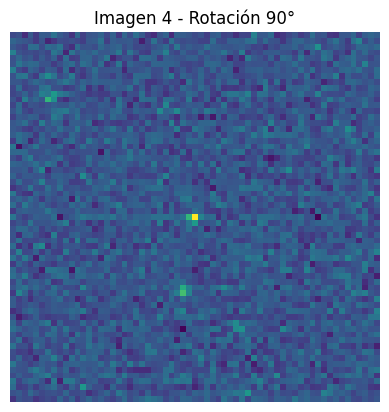

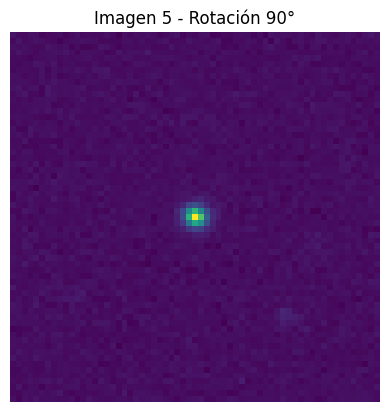

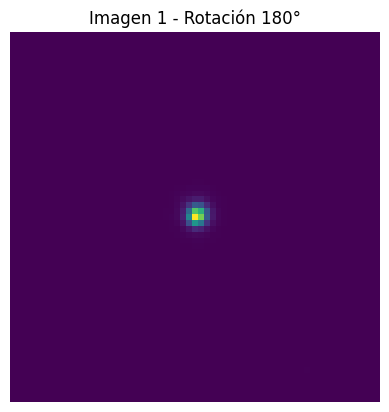

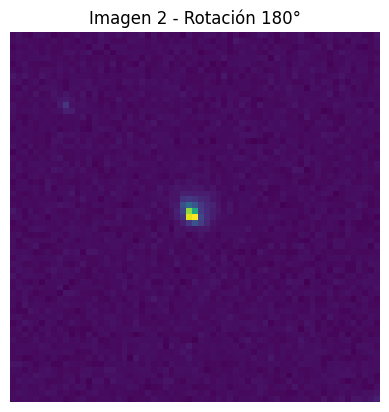

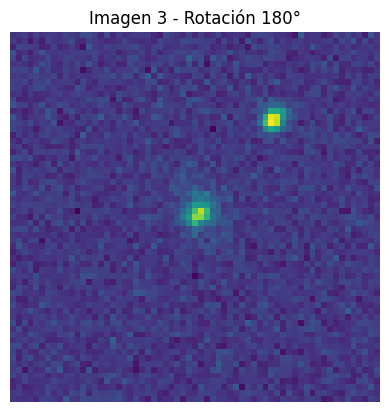

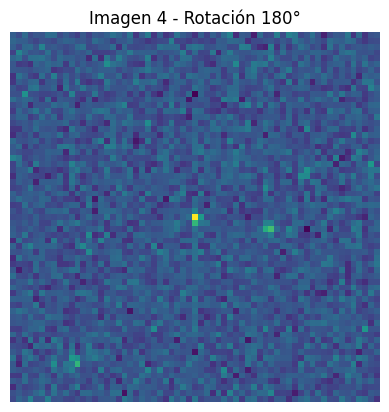

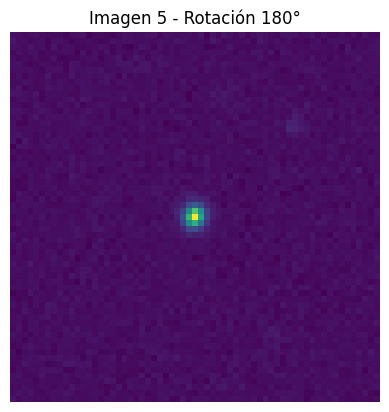

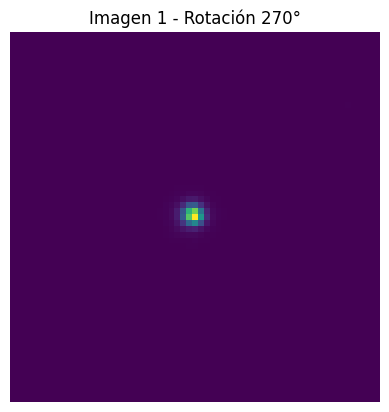

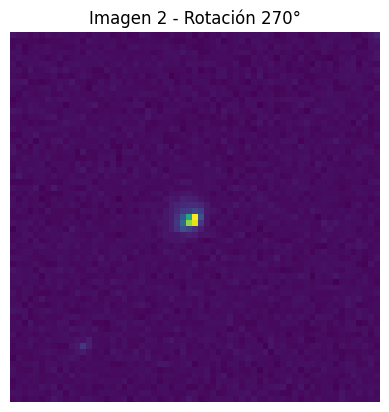

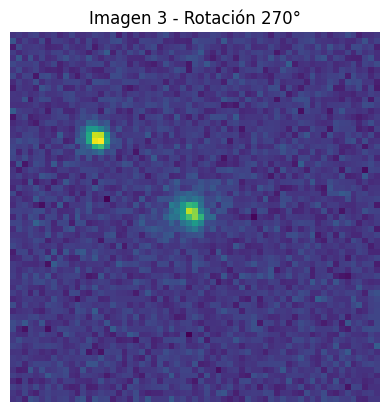

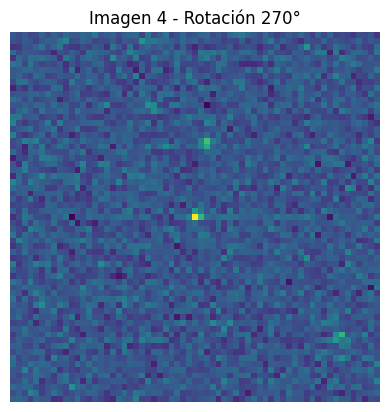

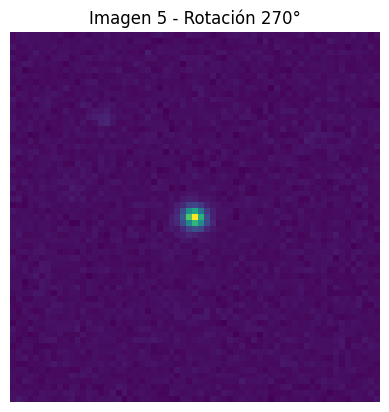

In [ ]:
# Llamar a la función con science_test
lista0, lista90, lista180, lista270 = rotar_imagenes_conjuntas(science_train)


N=5

# Mostrar las primeras N imágenes
for i in range(N):
    plt.imshow(lista0[i])
    plt.title(f"Imagen {i+1} - Rotación 0°")
    plt.axis('off')  # Ocultar los ejes
    plt.show()  # Mostrar cada imagen


# Mostrar las primeras N imágenes
for i in range(N):
    plt.imshow(lista90[i])
    plt.title(f"Imagen {i+1} - Rotación 90°")
    plt.axis('off')  # Ocultar los ejes
    plt.show()  # Mostrar cada imagen

# Mostrar las primeras N imágenes
for i in range(N):
    plt.imshow(lista180[i])
    plt.title(f"Imagen {i+1} - Rotación 180°")
    plt.axis('off')  # Ocultar los ejes
    plt.show()  # Mostrar cada imagen

# Mostrar las primeras N imágenes
for i in range(N):
    plt.imshow(lista270[i])
    plt.title(f"Imagen {i+1} - Rotación 270°")
    plt.axis('off')  # Ocultar los ejes
    plt.show()  # Mostrar cada imagen

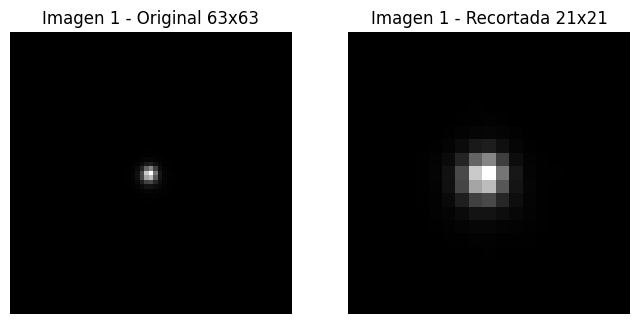

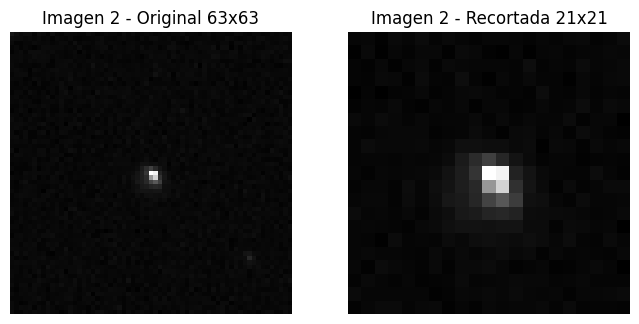

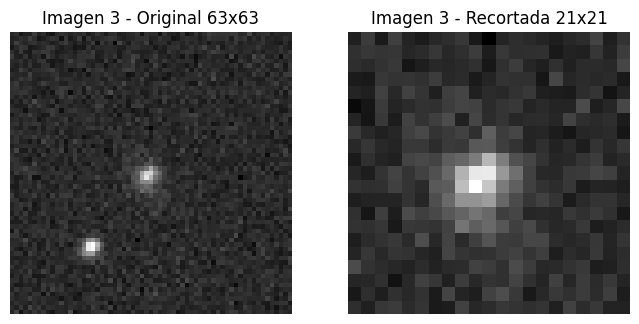

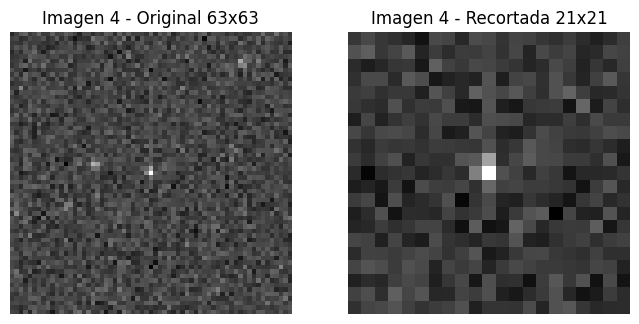

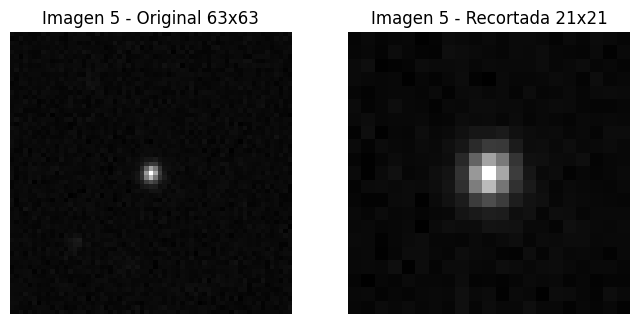

In [ ]:
# Llamar a la función y guardar las imágenes recortadas en una lista
Sinrecortar63x63, recortadas21x21 = recortar_conjunto_centro(science_train)

N = 5  # Número de imágenes que se van a mostrar

# Mostrar las primeras N imágenes originales y recortadas juntas
for i in range(N):
    # Crear una figura con dos subplots para la imagen original y la recortada
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # 1 fila, 2 columnas

    # Mostrar la imagen original 63x63
    axs[0].imshow(Sinrecortar63x63[i], cmap='gray')
    axs[0].set_title(f"Imagen {i+1} - Original 63x63")
    axs[0].axis('off')  # Ocultar los ejes

    # Mostrar la imagen recortada 21x21
    axs[1].imshow(recortadas21x21[i], cmap='gray')
    axs[1].set_title(f"Imagen {i+1} - Recortada 21x21")
    axs[1].axis('off')  # Ocultar los ejes

    # Mostrar las imágenes
    plt.show()

## Implementación de CNN

###Arquitectura###


In [ ]:
class CustomCNN(nn.Module):
    def __init__(self, dropout_p):
        super(CustomCNN, self).__init__()

        # Bloques de la CNN
        self.zero_padding = nn.ZeroPad2d(3)
        self.conv1 = nn.Conv2d(3, 32, kernel_size=4)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.relu4 = nn.ReLU()
        self.conv5 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.relu5 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(6 * 6 * 64, 64)
        self.rotation_concat = nn.Linear(64, 64)
        self.bn_concat = nn.Linear(87, 64)
        self.fc_dropout1 = nn.Sequential(
            nn.Linear(90, 64),
            nn.ReLU(),
            nn.Dropout(p=dropout_p)
        )
        self.fc2 = nn.Linear(64, 64)
        self.output_layer = nn.Linear(64, 5)

    def forward(self, x):
        # Forward pass
        x = self.zero_padding(x)
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool1(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.conv5(x)
        x = self.relu5(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.rotation_concat(x)
        x = torch.cat((x, torch.randn(x.size(0), 23).to(x.device)), dim=1)  #Cuidar tensor
        x = self.fc_dropout1(x)
        x = self.fc2(x)
        x = self.output_layer(x)
        return x

###Visualizacion de curvas###

In [ ]:
def show_curves(curves):
    fig, ax = plt.subplots(1, 2, figsize=(13, 5))
    fig.set_facecolor('white')
    epochs = np.arange(len(curves["val_loss"])) + 1

    # Gráfico de Pérdida
    ax[0].plot(epochs, curves['val_loss'], label='Validación', color='blue')
    ax[0].plot(epochs, curves['train_loss'], label='Entrenamiento', color='orange')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Evolución de Loss durante el Entrenamiento')
    ax[0].legend()

    # Gráfico de Precisión
    ax[1].plot(epochs, curves['val_acc'], label='Validación', color='blue')
    ax[1].plot(epochs, curves['train_acc'], label='Entrenamiento', color='orange')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Evolución de Accuracy durante el Entrenamiento')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

###Entrenamiento###

In [ ]:
def entropy_regularization(predictions, beta=0.5):
    """Calcula el término de regularización de entropía."""
    entropy = -torch.sum(predictions * torch.log(predictions + 1e-10), dim=1)  # Agregar epsilon para evitar log(0)
    return beta * entropy.mean()

def train_step(x_batch, y_batch, model, optimizer, criterion, use_gpu, beta):
    # Generar versiones rotadas de la entrada
    x_rotated = torch.cat([x_batch,
                            torch.rot90(x_batch, 1, [2, 3]),
                            torch.rot90(x_batch, 2, [2, 3]),
                            torch.rot90(x_batch, 3, [2, 3])], dim=0)
    y_rotated = y_batch.repeat(4)  # Duplicar las etiquetas para cada rotación

    # Predicción
    y_predicted = model(x_rotated)

    # Cálculo de loss
    loss = criterion(y_predicted, y_rotated)

    # Regularización de entropía
    entropy_loss = entropy_regularization(y_predicted)

    # Actualización de parámetros
    optimizer.zero_grad()
    (loss + entropy_loss).backward()  # Sumar la pérdida de entropía a la pérdida original
    optimizer.step()

    return y_predicted, loss

def evaluate(val_loader, model, criterion, use_gpu, beta):
    cumulative_loss = 0
    cumulative_predictions = 0
    data_count = 0

    for x_val, y_val in val_loader:
        if use_gpu:
            x_val = x_val.cuda()
            y_val = y_val.cuda()

        # Generar versiones rotadas de la entrada
        x_rotated = torch.cat([x_val,
                                torch.rot90(x_val, 1, [2, 3]),
                                torch.rot90(x_val, 2, [2, 3]),
                                torch.rot90(x_val, 3, [2, 3])], dim=0)
        y_rotated = y_val.repeat(4)  # Duplicar las etiquetas para cada rotación

        y_predicted = model(x_rotated)

        loss = criterion(y_predicted, y_rotated)

        class_prediction = torch.argmax(y_predicted, axis=1).long()

        cumulative_predictions += (y_rotated == class_prediction).sum().item()
        cumulative_loss += loss.item()
        data_count += y_rotated.shape[0]

    val_acc = cumulative_predictions / data_count
    val_loss = cumulative_loss / len(val_loader)

    return val_acc, val_loss

def train_model(
    model,
    train_dataset,
    val_dataset,
    epochs,
    criterion,
    batch_size,
    lr,
    n_evaluations_per_epoch=6,
    use_gpu=False,
    data_augmentation=False,
    beta=0.5,  # Parámetro para regularización de entropía
):
    original_transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ])

    if data_augmentation:
        train_dataset.dataset.transform = torchvision.transforms.Compose([
            original_transform,
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.Lambda(lambda x: x + torch.randn(3, 1, 1) * 0.05)
        ])
    else:
        train_dataset.dataset.transform = original_transform

    print(f"Using train transform: {train_dataset.dataset.transform}")
    print(f"Using validation transform: {val_dataset.dataset.transform}")

    if use_gpu:
        model.cuda()

    # Definición de optimizador
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Registro de métricas
    train_loss, train_acc = [], []
    val_loss, val_acc = [], []
    curves = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}

    # Iniciar el ciclo de entrenamiento
    for epoch in range(epochs):
        model.train()
        cumulative_loss = 0
        cumulative_predictions = 0
        data_count = 0

        # Carga de datos
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        for x_batch, y_batch in train_loader:
            if use_gpu:
                x_batch = x_batch.cuda()
                y_batch = y_batch.cuda()

            y_predicted, loss = train_step(x_batch, y_batch, model, optimizer, criterion, use_gpu, beta)

            class_prediction = torch.argmax(y_predicted, axis=1).long()

            cumulative_predictions += (y_batch == class_prediction).sum().item()
            cumulative_loss += loss.item()
            data_count += y_batch.shape[0]

        # Calcular precisión y pérdida promedio
        train_acc_epoch = cumulative_predictions / data_count
        train_loss_epoch = cumulative_loss / len(train_loader)

        # Evaluar
        model.eval()
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        val_acc_epoch, val_loss_epoch = evaluate(val_loader, model, criterion, use_gpu, beta)

        # Guardar resultados
        curves["train_loss"].append(train_loss_epoch)
        curves["train_acc"].append(train_acc_epoch)
        curves["val_loss"].append(val_loss_epoch)
        curves["val_acc"].append(val_acc_epoch)

        print(f"Epoch {epoch + 1}/{epochs}: "
              f"Train Loss: {train_loss_epoch:.4f}, "
              f"Train Acc: {train_acc_epoch:.4f}, "
              f"Val Loss: {val_loss_epoch:.4f}, "
              f"Val Acc: {val_acc_epoch:.4f}")

    return curves

### Creación del modelo a entrenar

In [ ]:
# Definir la arquitectura de la red neuronal convolucional
def build_model():
    model = models.Sequential()

    # Primera capa convolucional con normalización batch
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # Changed input_shape to (32, 32, 3)
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Segunda capa convolucional
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Tercera capa convolucional
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Aplanamiento y capas densas
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))  # Changed to 10 classes for CIFAR-10

    return model

### Construir, compilar, entrenar

In [ ]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()

# Preproceso y normalización de data
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# Por crossentropy convertimos los labels en one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)


# Construir el modelo
model = build_model()

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=100,
                    batch_size=64, validation_data=(X_val, y_val))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3642 - loss: 1.8496 - val_accuracy: 0.5493 - val_loss: 1.2411
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5515 - loss: 1.2576 - val_accuracy: 0.5596 - val_loss: 1.2416
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6272 - loss: 1.0567 - val_accuracy: 0.6628 - val_loss: 0.9710
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6739 - loss: 0.9331 - val_accuracy: 0.6478 - val_loss: 0.9967
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7054 - loss: 0.8474 - val_accuracy: 0.6579 - val_loss: 1.0093
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7340 - loss: 0.7668 - val_accuracy: 0.6964 - val_loss: 0.8908
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7563 - loss: 0.6954 - val_accuracy: 0.7273 - val_loss: 0.7942
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7764 - loss: 0.6459 - val_ac

#### Visualización de pérdida, precisión y matrices de confusión

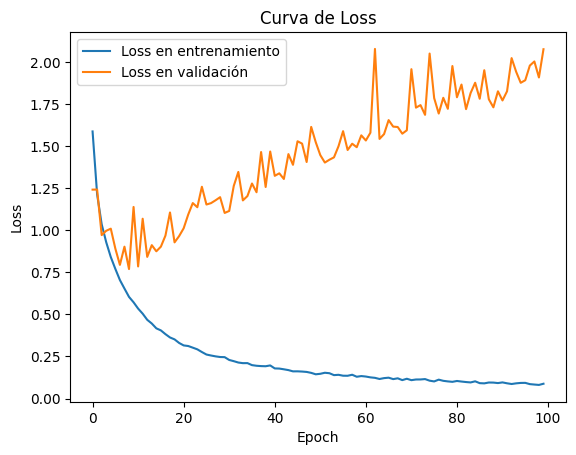

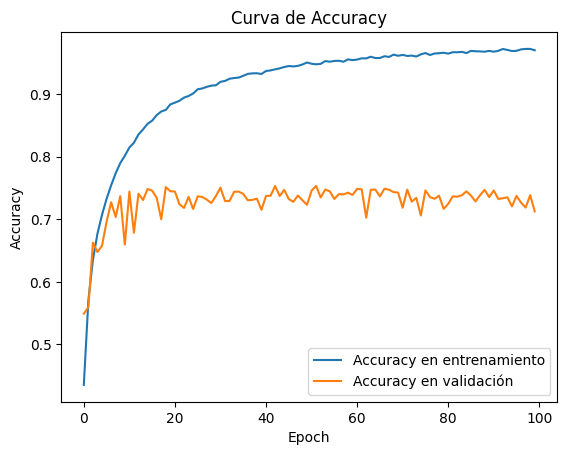

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


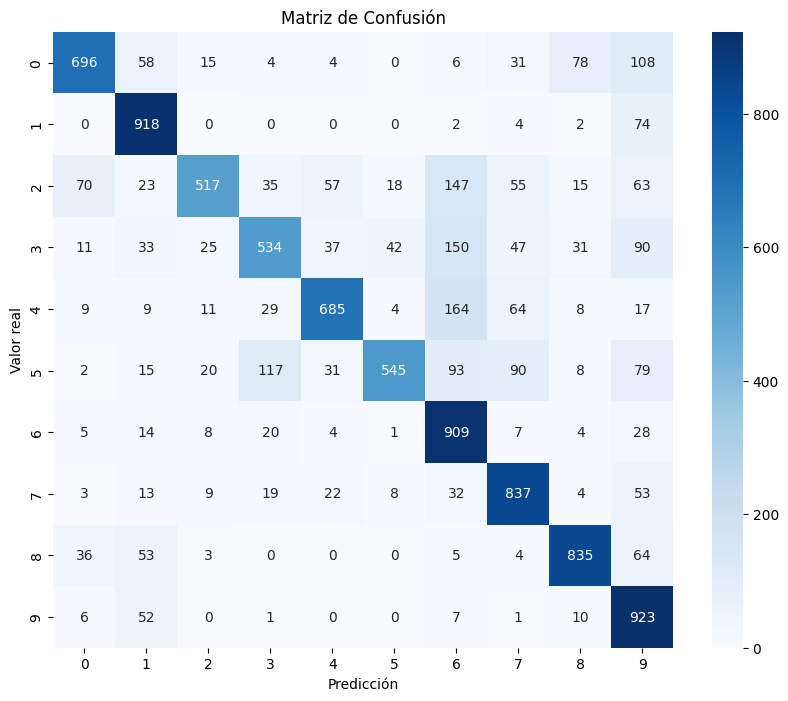

In [ ]:
# prompt: gimme plots for loss and accuracy, also i want confussion matrixes

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Visualizar la curva de pérdida
plt.plot(history.history['loss'], label='Loss en entrenamiento')
plt.plot(history.history['val_loss'], label='Loss en validación')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Curva de Loss')
plt.show()

# Visualizar la curva de precisión
plt.plot(history.history['accuracy'], label='Accuracy en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy en validación')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curva de Accuracy')
plt.show()


# Obtener las predicciones para el conjunto de validación
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)


# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# Obtener las predicciones para el conjunto de validación
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Calcular el F1-score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')  # 'weighted' para tener en cuenta el desbalanceo de clases

print("F1-score:", f1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1-score: 0.7345795853337816


### Aumento de data

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Ajustar el generador de datos al conjunto de entrenamiento
datagen.fit(X_train)

# Re-entrenar el modelo usando datos aumentados
history_augmented = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                              epochs=100, validation_data=(X_val, y_val))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.4353 - loss: 1.8489 - val_accuracy: 0.6832 - val_loss: 0.9372
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.5157 - loss: 1.3979 - val_accuracy: 0.7141 - val_loss: 0.8543
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.5401 - loss: 1.3202 - val_accuracy: 0.7147 - val_loss: 0.8519
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.5595 - loss: 1.2727 - val_accuracy: 0.6925 - val_loss: 0.8918
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.5805 - loss: 1.2268 - val_accuracy: 0.6922 - val_loss: 0.9148
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.5908 - loss: 1.2003 - val_accuracy: 0.6733 - val_loss: 0.9352
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.5975 - loss: 1.1779 - val_accuracy: 0.6878 - val_loss: 0.9275
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.6044 - loss: 1.1599 - val_

In [ ]:
## Obtener las predicciones para el conjunto de validación con el modelo entrenado con aumento de datos
y_pred_augmented = model.predict(X_val)
y_pred_classes_augmented = np.argmax(y_pred_augmented, axis=1)
y_true_classes_augmented = np.argmax(y_val, axis=1)

# Calcular el F1-score para el modelo con aumento de datos
f1_augmented = f1_score(y_true_classes_augmented, y_pred_classes_augmented, average='weighted')

print("F1-score con aumento de datos:", f1_augmented)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
F1-score con aumento de datos: 0.7345795853337816


#### Visualización de pérdidas, precisión y matrices de confusión

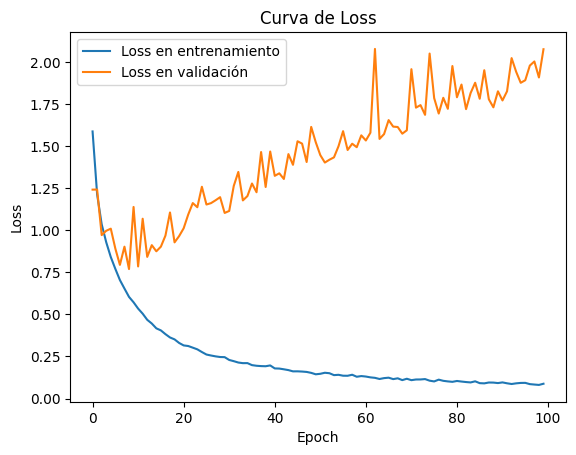

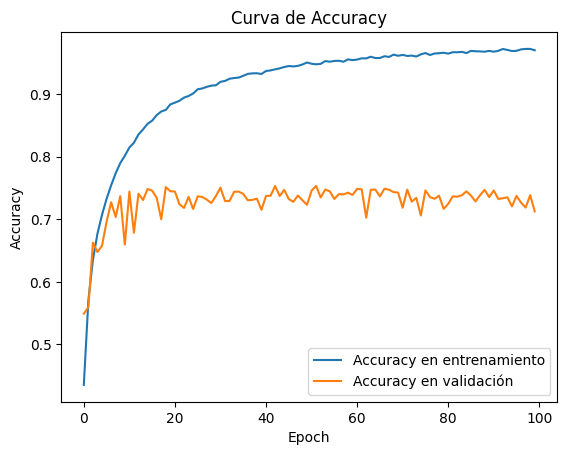

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


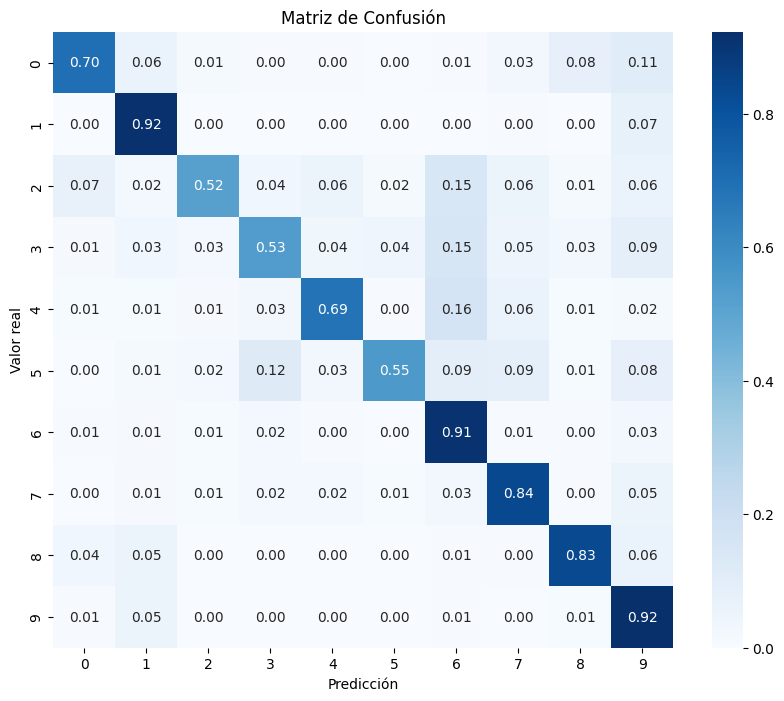

In [ ]:
# Visualizar la curva de pérdida
plt.plot(history.history['loss'], label='Loss en entrenamiento')
plt.plot(history.history['val_loss'], label='Loss en validación')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Curva de Loss')
plt.show()

# Visualizar la curva de precisión
plt.plot(history.history['accuracy'], label='Accuracy en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy en validación')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curva de Accuracy')
plt.show()


# Obtener las predicciones para el conjunto de validación
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes, normalize='true')  # Normalize to get percentages

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='.2f', cmap='Blues') # Changed fmt to '.2f' for normalized values
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()
